In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
from past.builtins import xrange
%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # 设置默认大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# 读取提供的cifar10-mini数据集，
data = np.load('cifar10-mini.npz')

X_train= data['X_train']
X_val= data['X_val']
X_test= data['X_test']
y_train= data['y_train']
y_val= data['y_val']
y_test= data['y_test']

# 打印数据shape
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(5000, 32, 32, 3)
(500, 32, 32, 3)
(500, 32, 32, 3)


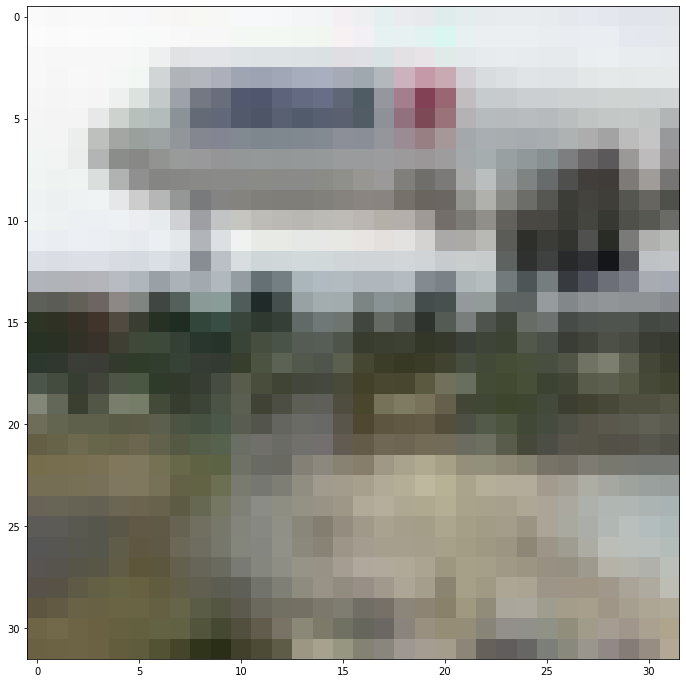

In [10]:
# 查看数据集图像
pic_index = 223#第几张图片
plt.imshow(X_train[pic_index].astype(int))

In [19]:
from features import *

################################################################################
# TODO:                                                                        #
# 你需要使用 hog_feature, color_histogram_hsv 两个函数完成特征的提取           #
# 你可以在 features.py 中查看这两个函数的代码                                  #
################################################################################
"""你的代码"""
"""HOG+Hist"""
X_train_feats = extract_features(X_train,[hog_feature,color_histogram_hsv])
X_val_feats = extract_features(X_val,[hog_feature,color_histogram_hsv])
X_test_feats = extract_features(X_test,[hog_feature,color_histogram_hsv])
"""HOG"""
# X_train_feats = extract_features(X_train,[hog_feature])
# X_val_feats = extract_features(X_val,[hog_feature])
# X_test_feats = extract_features(X_test,[hog_feature])
"""Hist"""
# X_train_feats = extract_features(X_train,[color_histogram_hsv])
# X_val_feats = extract_features(X_val,[color_histogram_hsv])
# X_test_feats = extract_features(X_test,[color_histogram_hsv])
"""onlypix"""
# X_train_feats = extract_features(X_train,[only_pixel])
# X_val_feats = extract_features(X_val,[only_pixel])
# X_test_feats = extract_features(X_test,[only_pixel])
    
# 预处理: 减去均值
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat

mean_feat = np.mean(X_val_feats, axis=0, keepdims=True)
X_val_feats -= mean_feat

mean_feat = np.mean(X_test_feats, axis=0, keepdims=True)
X_test_feats -= mean_feat

# 预处理: 除以标准差，这能保证所有的值在 0～1 之间
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat

std_feat = np.std(X_val_feats, axis=0, keepdims=True)
X_val_feats /= std_feat

std_feat = np.std(X_test_feats, axis=0, keepdims=True)
X_test_feats /= std_feat

# 预处理: 增加一个偏置值，在 K-NN 中，该步操作并无必要，但增加偏置值对其他分类器如 SVM 等有帮助。
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

In [20]:
X_train_feats.shape , y_train.shape

((5000, 155), (5000,))

In [103]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
clf = GaussianNB()
clf = clf.fit(X_train_feats , y_train)

In [100]:
import time

In [95]:

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf = clf.fit(X_train_feats , y_train)

In [104]:
old_time = time.time()
y_train_pred = clf.predict(X_train_feats)
train_acc = sum(y_train_pred==y_train)/len(y_train)
current_time = time.time()
print("运行时间为" + str(current_time - old_time) + "s")
train_acc 

运行时间为0.925652027130127s


0.3032

In [97]:
y_test_pred = clf.predict(X_test_feats)
test_acc = sum(y_test_pred==y_test)/len(y_test)
test_acc 

0.272

In [98]:
y_val_pred = clf.predict(X_val_feats)
val_acc = sum(y_val_pred==y_val)/len(y_val)
val_acc 

0.228

In [74]:
'''
GaussianNB
func     train    test     val

pix      0.3032   0.292   0.276             运行时间为0.925652027130127s
hist     0.2362   0.246   0.204
HOG      0.4208   0.34    0.36
HOG+Hist 0.4456   0.356   0.38

'''

'\nGaussianNB\nfunc     train    test     val\n\npix      0.3032   0.292   0.276\nhist     0.2362   0.246   0.204\nHOG      0.4208   0.34    0.36\nHOG+Hist 0.4456   0.356   0.38\n\n'

In [102]:
"""
KNN

func      train      test      val

pix       0.4542    0.272    0.228      运行时间为131.66007900238037s
Hist      0.4412    0.216    0.176
HOG       0.5176    0.288    0.278
HOG+Hist  0.546     0.318    0.294

"""

'\nKNN\n\nfunc      train      test      val\n\npix       0.4542    0.272    0.228     \nHist      0.4412    0.216    0.176\nHOG       0.5176    0.288    0.278\nHOG+Hist  0.546     0.318    0.294\n'

In [105]:
train_score = [0.4542,0.4412,0.5176,0.546]
test_score = [0.272,0.216,0.288,0.318]
val_score = [0.228,0.176,0.278,0.294]

In [ ]:
train_x = []

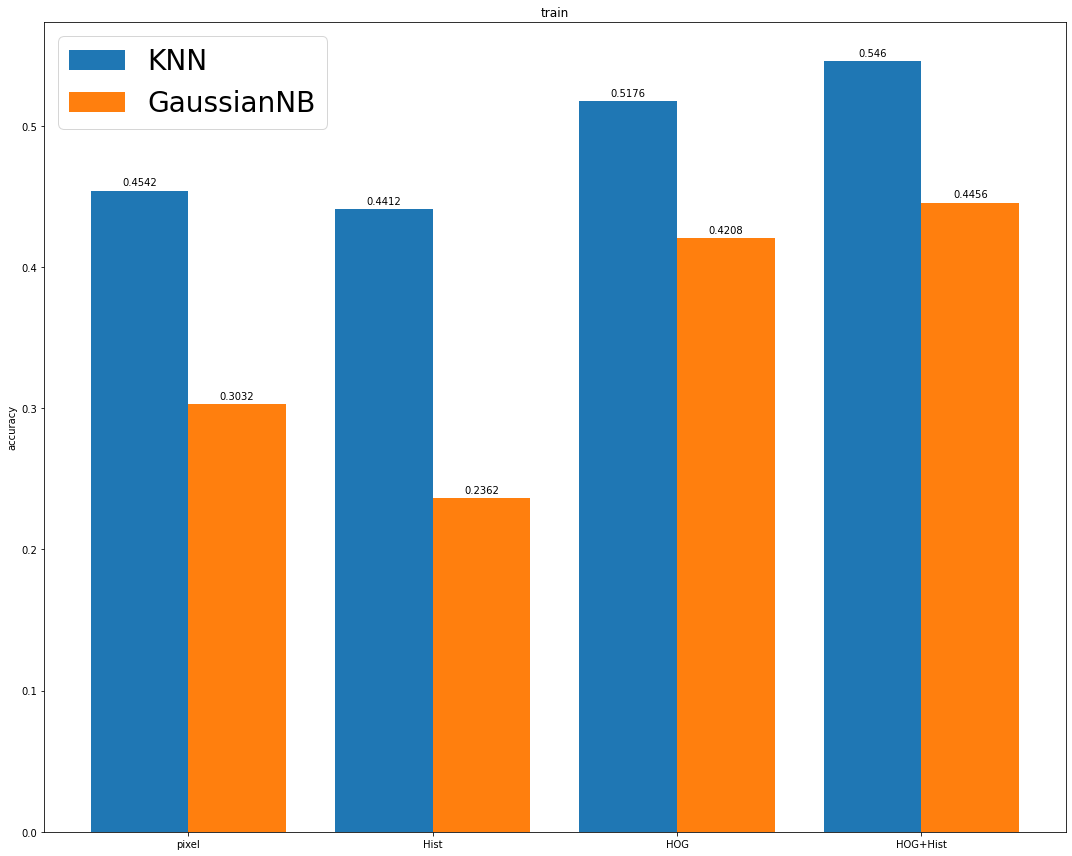

In [129]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['pixel', 'Hist', 'HOG', 'HOG+Hist']
KNN_train = [0.4542,0.4412,0.5176,0.546]
NB_train = [0.3032,0.2362,0.4208,0.4456]


x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x -width/2, KNN_train, width, label='KNN')
rects2 = ax.bar(x + width/2, NB_train, width, label='GaussianNB')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('accuracy')
ax.set_title('train')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(prop={'size':28})


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()



TypeError: set_ticks() got an unexpected keyword argument 'fontsize'

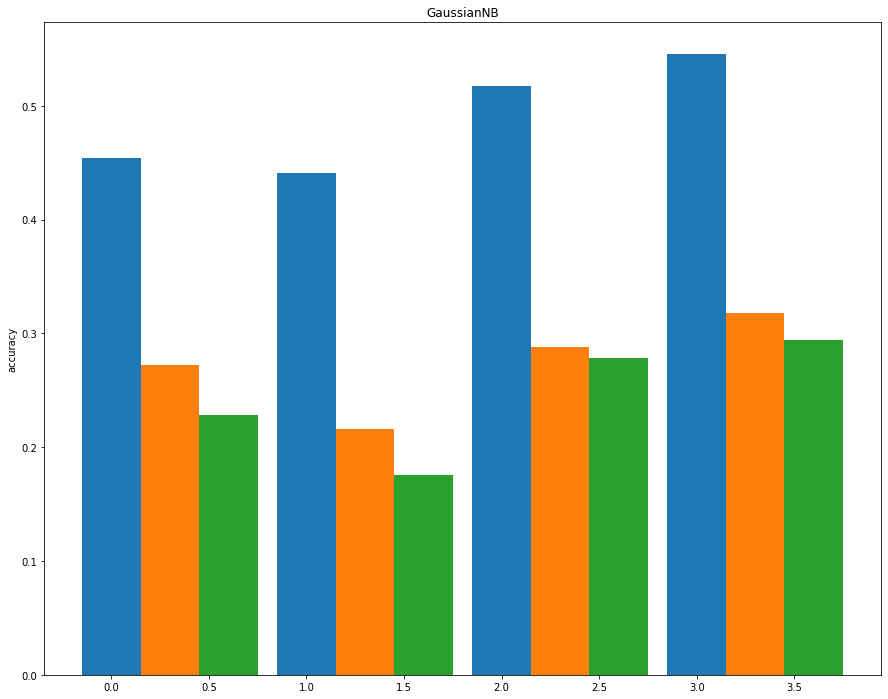

In [130]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['pixel', 'Hist', 'HOG', 'HOG+Hist']
train_value = [0.4542,0.4412,0.5176,0.546]
test_value = [0.272,0.216,0.288,0.318]
val_value = [0.228,0.176,0.278,0.294]

x = np.arange(len(labels))  # the label locations
width = 0.9  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x , train_value, width/3, label='train')
rects2 = ax.bar(x + width*1/3, test_value, width/3, label='test')
rects3 = ax.bar(x + width*2/3, val_value, width/3, label='val')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('accuracy')
ax.set_title('GaussianNB')
ax.set_xticks(x,)
ax.set_xticklabels(labels)
ax.legend(prop={'size':28})


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

